Last updated: 16 Feb 2023

# 👋 PyCaret Multiclass Classification Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [12]:
pip install pycaret[full]

In [13]:
pip install ucimlrepo

In [14]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative).

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chess = fetch_ucirepo(id=22)

# data (as pandas dataframes)
X = chess.data.features
y = chess.data.targets

# metadata
print(chess.metadata)

# variable information
print(chess.variables)



{'uci_id': 22, 'name': 'Chess (King-Rook vs. King-Pawn)', 'repository_url': 'https://archive.ics.uci.edu/dataset/22/chess+king+rook+vs+king+pawn', 'data_url': 'https://archive.ics.uci.edu/static/public/22/data.csv', 'abstract': 'King+Rook versus King+Pawn on a7 (usually abbreviated KRKPA7).', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3196, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['wtoeg'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5DK5C', 'creators': ['Alen Shapiro'], 'intro_paper': None, 'additional_info': {'summary': 'The dataset format is described below.  Note: the format of this database was modified on 2/26/90 to conform with the format of all the other databases in the UCI repository of machine learning databases.', 'purpose': None, 'funded_by': 

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [16]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(X, target = y, session_id = 123, index=False)

,Description,Value
0,Session id,123
1,Target,wkpos
2,Target type,Binary
3,Target mapping,"n: 0, t: 1"
4,Original data shape,"(3196, 35)"
5,Transformed data shape,"(3196, 37)"
6,Transformed train set shape,"(2237, 37)"
7,Transformed test set shape,"(959, 37)"
8,Categorical features,34
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [17]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [18]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [19]:
# init setup on exp
exp.setup(X, target = y, session_id = 123, index=False)

,Description,Value
0,Session id,123
1,Target,wkpos
2,Target type,Binary
3,Target mapping,"n: 0, t: 1"
4,Original data shape,"(3196, 35)"
5,Transformed data shape,"(3196, 37)"
6,Transformed train set shape,"(2237, 37)"
7,Transformed test set shape,"(959, 37)"
8,Categorical features,34
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [20]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8176,0.8991,0.8176,0.8081,0.8092,0.4694,0.4765,0.5980
catboost,CatBoost Classifier,0.8096,0.8992,0.8096,0.8042,0.8055,0.4677,0.4705,4.6420
lr,Logistic Regression,0.8073,0.8876,0.8073,0.7995,0.8006,0.4496,0.4551,1.2840
ridge,Ridge Classifier,0.8069,0.8839,0.8069,0.8043,0.8039,0.4669,0.4702,0.6540
ada,Ada Boost Classifier,0.8060,0.8881,0.8060,0.7981,0.7995,0.4472,0.4520,0.7330
lda,Linear Discriminant Analysis,0.8029,0.8838,0.8029,0.8127,0.8059,0.4892,0.4927,0.6880
svm,SVM - Linear Kernel,0.8010,0.8798,0.8010,0.8097,0.7946,0.4455,0.4656,0.3860
lightgbm,Light Gradient Boosting Machine,0.7966,0.8905,0.7966,0.7939,0.7945,0.4427,0.4441,0.7870
knn,K Neighbors Classifier,0.7903,0.8475,0.7903,0.7825,0.7848,0.4091,0.4120,0.4370
xgboost,Extreme Gradient Boosting,0.7863,0.8872,0.7863,0.7855,0.7853,0.4207,0.4218,0.6930


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [21]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8176,0.8991,0.8176,0.8081,0.8092,0.4694,0.4765,0.6750
catboost,CatBoost Classifier,0.8096,0.8992,0.8096,0.8042,0.8055,0.4677,0.4705,4.6300
lr,Logistic Regression,0.8073,0.8876,0.8073,0.7995,0.8006,0.4496,0.4551,0.6220
ridge,Ridge Classifier,0.8069,0.8839,0.8069,0.8043,0.8039,0.4669,0.4702,0.3790
ada,Ada Boost Classifier,0.8060,0.8881,0.8060,0.7981,0.7995,0.4472,0.4520,0.7510
lda,Linear Discriminant Analysis,0.8029,0.8838,0.8029,0.8127,0.8059,0.4892,0.4927,0.3830
svm,SVM - Linear Kernel,0.8010,0.8798,0.8010,0.8097,0.7946,0.4455,0.4656,0.4400
lightgbm,Light Gradient Boosting Machine,0.7966,0.8905,0.7966,0.7939,0.7945,0.4427,0.4441,1.0790
knn,K Neighbors Classifier,0.7903,0.8475,0.7903,0.7825,0.7848,0.4091,0.4120,0.3970
xgboost,Extreme Gradient Boosting,0.7863,0.8872,0.7863,0.7855,0.7853,0.4207,0.4218,0.5980


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

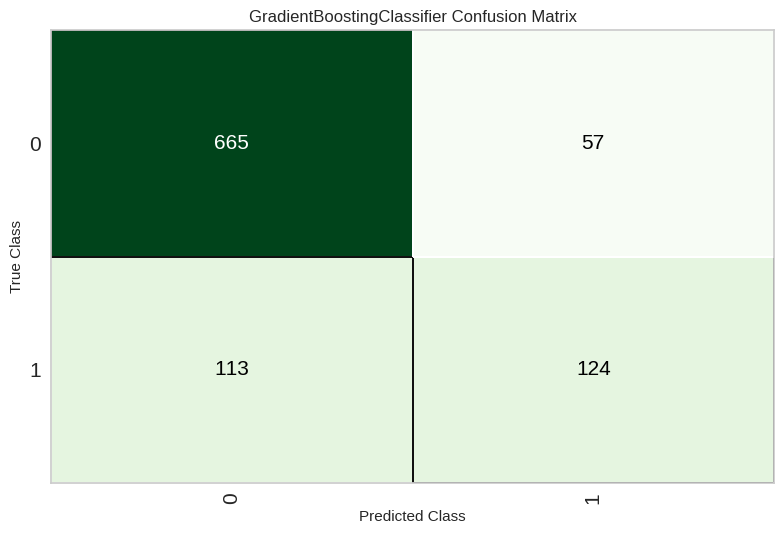

In [22]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

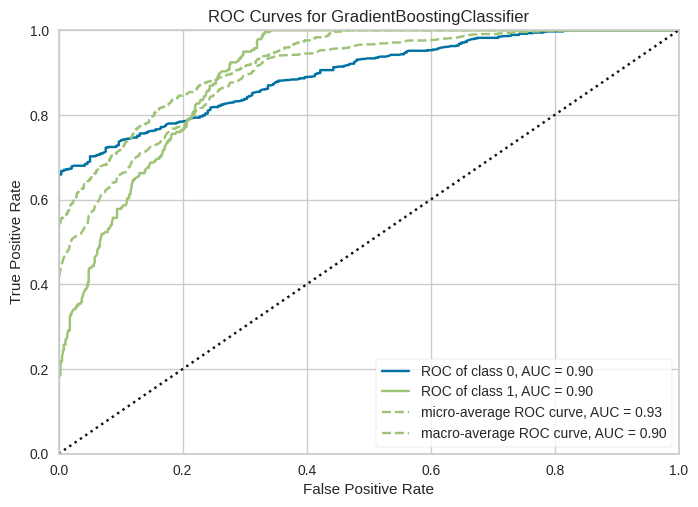

In [23]:
# plot AUC
plot_model(best, plot = 'auc')

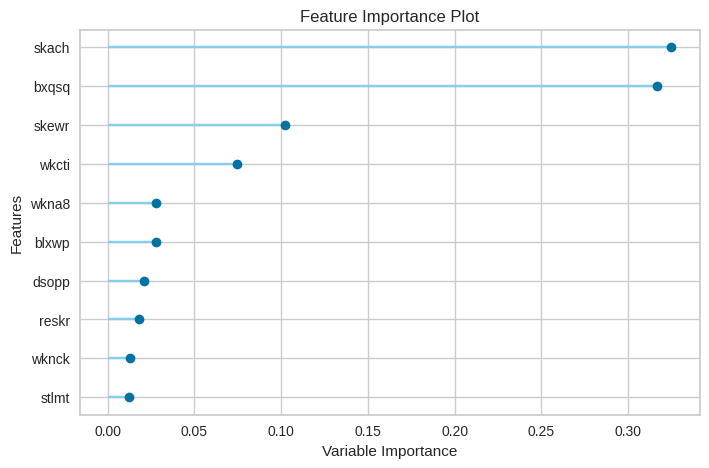

In [24]:
# plot feature importance
plot_model(best, plot = 'feature')

In [25]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [26]:
evaluate_model(best)

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1


No charts were generated by quickchart
No charts were generated by quickchart


## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [27]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8227,0.8957,0.8227,0.8128,0.8142,0.4826,0.4897


In [28]:
# show predictions df
holdout_pred.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,prediction_label,prediction_score
2237,f,f,f,t,f,t,t,t,f,f,...,f,f,f,f,f,f,t,n,n,0.6135
2238,f,f,f,f,t,t,f,f,f,t,...,f,f,f,f,f,t,t,n,n,0.9956
2239,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,n,n,0.7727
2240,f,f,f,f,f,t,f,f,f,t,...,f,f,f,f,f,t,f,n,n,0.9969
2241,t,f,f,f,f,f,f,f,t,f,...,f,f,t,t,t,t,f,n,n,0.9926


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [30]:
# copy data and drop Class variable

new_data = X.copy()
new_data.drop('wkpos', axis=1, inplace=True)
new_data.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl
f,f,f,f,f,f,f,f,f,f,f,...,t,f,f,f,f,f,f,f,t,t
f,f,f,f,t,f,f,f,f,f,f,...,t,f,f,f,f,f,f,f,t,t
f,f,f,f,t,f,t,f,f,f,f,...,t,f,f,f,f,f,f,f,t,t
f,f,f,f,f,f,f,f,t,f,f,...,t,f,f,f,f,f,f,f,t,t
f,f,f,f,f,f,f,f,f,f,f,...,t,f,f,f,f,f,f,f,t,t


In [31]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,prediction_label,prediction_score
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,0.6862
1,f,f,f,t,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,0.7835
2,f,f,f,t,f,t,f,f,f,f,...,f,f,f,f,f,f,t,t,n,0.7499
3,f,f,f,f,f,f,f,t,f,f,...,f,f,f,f,f,f,t,t,n,0.7464
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,0.6883


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [32]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss=

In [33]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [218]:
s = setup(X, target = y, session_id = 123, index=False)

,Description,Value
0,Session id,123
1,Target,wkpos
2,Target type,Binary
3,Target mapping,"n: 0, t: 1"
4,Original data shape,"(3196, 35)"
5,Transformed data shape,"(3196, 37)"
6,Transformed train set shape,"(2237, 37)"
7,Transformed test set shape,"(959, 37)"
8,Categorical features,34
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [219]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [220]:
# lets access X_train_transformed
get_config('X_train_transformed')

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2233,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2234,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2235,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [221]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [222]:
# help(setup)

In [223]:
# init setup with normalize = True

s = setup(X, target = y, session_id = 123, index=False,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,wkpos
2,Target type,Binary
3,Target mapping,"n: 0, t: 1"
4,Original data shape,"(3196, 35)"
5,Transformed data shape,"(3196, 37)"
6,Transformed train set shape,"(2237, 37)"
7,Transformed test set shape,"(959, 37)"
8,Categorical features,34
9,Preprocess,True


<Axes: >

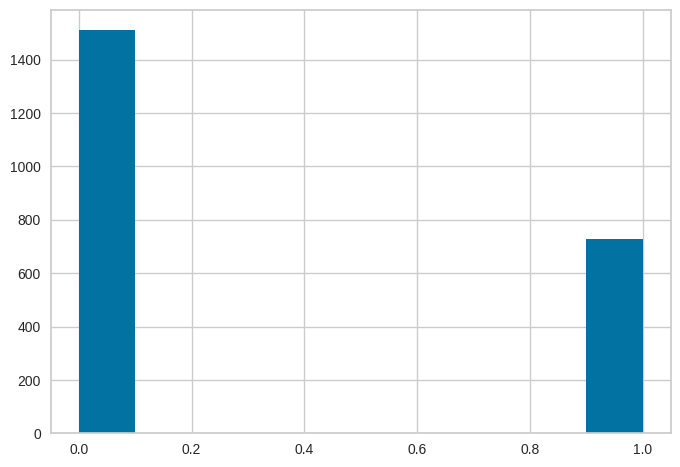

In [224]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['bkona'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

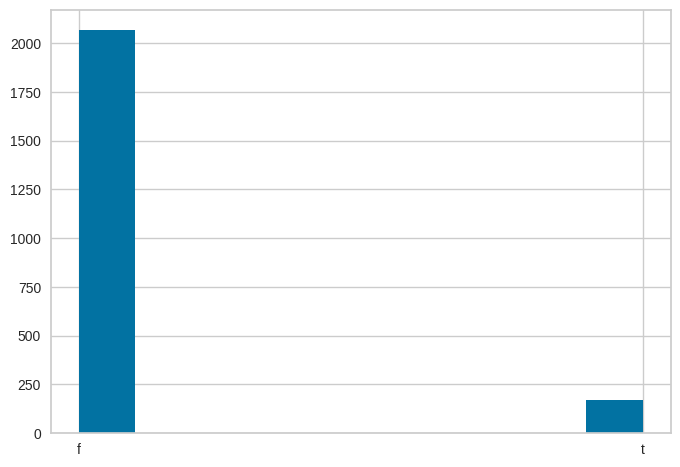

In [225]:
get_config('X_train')['bkblk'].hist()

## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [226]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8176,0.8991,0.8176,0.8081,0.8092,0.4694,0.4765,0.6800
catboost,CatBoost Classifier,0.8096,0.8992,0.8096,0.8042,0.8055,0.4677,0.4705,4.4640
lr,Logistic Regression,0.8073,0.8876,0.8073,0.7995,0.8006,0.4496,0.4551,0.4010
ridge,Ridge Classifier,0.8069,0.8839,0.8069,0.8043,0.8039,0.4669,0.4702,0.6700
ada,Ada Boost Classifier,0.8060,0.8881,0.8060,0.7981,0.7995,0.4472,0.4520,0.5910
lda,Linear Discriminant Analysis,0.8029,0.8838,0.8029,0.8127,0.8059,0.4892,0.4927,0.5850
svm,SVM - Linear Kernel,0.8010,0.8798,0.8010,0.8097,0.7946,0.4455,0.4656,0.3920
lightgbm,Light Gradient Boosting Machine,0.7966,0.8905,0.7966,0.7939,0.7945,0.4427,0.4441,0.6710
knn,K Neighbors Classifier,0.7903,0.8475,0.7903,0.7825,0.7848,0.4091,0.4120,0.3990
xgboost,Extreme Gradient Boosting,0.7863,0.8872,0.7863,0.7855,0.7853,0.4207,0.4218,0.9790


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [227]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [228]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8176,0.8991,0.8176,0.8081,0.8092,0.4694,0.4765,0.6490
catboost,CatBoost Classifier,0.8096,0.8992,0.8096,0.8042,0.8055,0.4677,0.4705,4.4980
lightgbm,Light Gradient Boosting Machine,0.7966,0.8905,0.7966,0.7939,0.7945,0.4427,0.4441,0.6650
xgboost,Extreme Gradient Boosting,0.7863,0.8872,0.7863,0.7855,0.7853,0.4207,0.4218,0.7300
et,Extra Trees Classifier,0.7725,0.7005,0.7725,0.7718,0.7713,0.3835,0.3848,0.9600
rf,Random Forest Classifier,0.7680,0.8372,0.7680,0.7666,0.7666,0.3696,0.3709,0.6620
dt,Decision Tree Classifier,0.7608,0.6837,0.7608,0.7567,0.7577,0.3418,0.3435,0.7150


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [229]:
compare_tree_models

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [230]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8176,0.8991,0.8176,0.8081,0.8092,0.4694,0.4765,0.649
catboost,CatBoost Classifier,0.8096,0.8992,0.8096,0.8042,0.8055,0.4677,0.4705,4.498
lightgbm,Light Gradient Boosting Machine,0.7966,0.8905,0.7966,0.7939,0.7945,0.4427,0.4441,0.665
xgboost,Extreme Gradient Boosting,0.7863,0.8872,0.7863,0.7855,0.7853,0.4207,0.4218,0.730
et,Extra Trees Classifier,0.7725,0.7005,0.7725,0.7718,0.7713,0.3835,0.3848,0.960
rf,Random Forest Classifier,0.7680,0.8372,0.7680,0.7666,0.7666,0.3696,0.3709,0.662
dt,Decision Tree Classifier,0.7608,0.6837,0.7608,0.7567,0.7577,0.3418,0.3435,0.715


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [231]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8176,0.8991,0.8176,0.8081,0.8092,0.4694,0.4765,0.9160
catboost,CatBoost Classifier,0.8096,0.8992,0.8096,0.8042,0.8055,0.4677,0.4705,4.5590
lr,Logistic Regression,0.8073,0.8876,0.8073,0.7995,0.8006,0.4496,0.4551,0.3980
ridge,Ridge Classifier,0.8069,0.8839,0.8069,0.8043,0.8039,0.4669,0.4702,0.3920
ada,Ada Boost Classifier,0.8060,0.8881,0.8060,0.7981,0.7995,0.4472,0.4520,0.5420
lda,Linear Discriminant Analysis,0.8029,0.8838,0.8029,0.8127,0.8059,0.4892,0.4927,0.3790
svm,SVM - Linear Kernel,0.8010,0.8798,0.8010,0.8097,0.7946,0.4455,0.4656,0.6320
lightgbm,Light Gradient Boosting Machine,0.7966,0.8905,0.7966,0.7939,0.7945,0.4427,0.4441,0.5330
knn,K Neighbors Classifier,0.7903,0.8475,0.7903,0.7825,0.7848,0.4091,0.4120,0.6140
xgboost,Extreme Gradient Boosting,0.7863,0.8872,0.7863,0.7855,0.7853,0.4207,0.4218,0.6130


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [232]:
# list of top 3 models by Recall
best_recall_models_top3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [233]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [234]:
# from pycaret.classification import *
# s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='iris_experiment')

In [235]:
# compare models
# best = compare_models()

In [236]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [237]:
# help(setup)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [238]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [239]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8943,0.8125,0.8063,0.8087,0.4746,0.4759
1,0.8170,0.9080,0.8170,0.8046,0.8027,0.4408,0.4564
2,0.8125,0.8951,0.8125,0.7999,0.8008,0.4389,0.4492
3,0.7991,0.8873,0.7991,0.7934,0.7958,0.4406,0.4415
4,0.7991,0.8958,0.7991,0.7895,0.7928,0.4261,0.4289
5,0.8036,0.8832,0.8036,0.8036,0.8036,0.4762,0.4762
6,0.7991,0.8705,0.7991,0.7882,0.7914,0.4268,0.4310
7,0.8296,0.9025,0.8296,0.8208,0.8221,0.5051,0.5114
8,0.7892,0.8540,0.7892,0.7905,0.7899,0.4363,0.4363


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [240]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8943,0.8125,0.8063,0.8087,0.4746,0.4759
1,0.8170,0.9080,0.8170,0.8046,0.8027,0.4408,0.4564
2,0.8125,0.8951,0.8125,0.7999,0.8008,0.4389,0.4492
3,0.7991,0.8873,0.7991,0.7934,0.7958,0.4406,0.4415
4,0.7991,0.8958,0.7991,0.7895,0.7928,0.4261,0.4289
5,0.8036,0.8832,0.8036,0.8036,0.8036,0.4762,0.4762
6,0.7991,0.8705,0.7991,0.7882,0.7914,0.4268,0.4310
7,0.8296,0.9025,0.8296,0.8208,0.8221,0.5051,0.5114
8,0.7892,0.8540,0.7892,0.7905,0.7899,0.4363,0.4363


In [241]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8204,0.9027,0.8204,0.8101,0.8116,0.4744,0.4816
1,0.8056,0.8863,0.8056,0.8019,0.8036,0.4662,0.4666
2,0.8054,0.8775,0.8054,0.7935,0.7961,0.4322,0.4384
Mean,0.8105,0.8888,0.8105,0.8018,0.8037,0.4576,0.4622
Std,0.0070,0.0105,0.0070,0.0068,0.0063,0.0183,0.0179


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [242]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8919,0.8125,0.8063,0.8087,0.4746,0.4759
1,0.8125,0.9095,0.8125,0.7993,0.7989,0.4311,0.4445
2,0.8170,0.8947,0.8170,0.8048,0.8046,0.4485,0.4607
3,0.7991,0.8884,0.7991,0.7934,0.7958,0.4406,0.4415
4,0.8080,0.8956,0.8080,0.7991,0.8020,0.4516,0.4546
5,0.7946,0.8812,0.7946,0.7946,0.7946,0.4524,0.4524
6,0.8036,0.8720,0.8036,0.7924,0.7952,0.4359,0.4411
7,0.8296,0.9016,0.8296,0.8208,0.8221,0.5051,0.5114
8,0.7892,0.8558,0.7892,0.7905,0.7899,0.4363,0.4363


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [244]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [245]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7455,0.6587,0.7455,0.7379,0.7413,0.2915,0.2920
1,0.7589,0.6547,0.7589,0.7401,0.7461,0.2882,0.2933
2,0.7321,0.6571,0.7321,0.7321,0.7321,0.2770,0.2770
3,0.7723,0.7196,0.7723,0.7766,0.7743,0.3966,0.3968
4,0.7812,0.7070,0.7812,0.7663,0.7706,0.3584,0.3637
5,0.7857,0.7314,0.7857,0.7911,0.7881,0.4419,0.4423
6,0.7634,0.6850,0.7634,0.7593,0.7612,0.3576,0.3578
7,0.7489,0.6794,0.7489,0.7552,0.7518,0.3404,0.3408
8,0.7399,0.6606,0.7399,0.7431,0.7415,0.3086,0.3087


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [246]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8259,0.8886,0.8259,0.8153,0.8141,0.4754,0.4883
1,0.8125,0.9037,0.8125,0.7992,0.7948,0.4150,0.4360
2,0.8214,0.8878,0.8214,0.8274,0.7896,0.3911,0.4570
3,0.7857,0.8698,0.7857,0.7912,0.7882,0.4355,0.4360
4,0.8259,0.8961,0.8259,0.8248,0.8254,0.5272,0.5272
5,0.7768,0.8709,0.7768,0.8167,0.7879,0.4792,0.4949
6,0.7812,0.8764,0.7812,0.7590,0.7546,0.3050,0.3301
7,0.8206,0.9040,0.8206,0.8145,0.7969,0.4176,0.4573
8,0.7713,0.8535,0.7713,0.7552,0.7602,0.3314,0.3364


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [247]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [248]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8036,0.8654,0.8036,0.7951,0.7981,0.4425,0.4448
1,0.8214,0.9069,0.8214,0.8117,0.8136,0.4797,0.4857
2,0.7991,0.8683,0.7991,0.7878,0.7911,0.4186,0.4228
3,0.8304,0.8909,0.8304,0.8216,0.8229,0.5057,0.5120
4,0.8348,0.9053,0.8348,0.8262,0.8268,0.5155,0.5232
5,0.8259,0.8983,0.8259,0.8213,0.8231,0.5215,0.5225
6,0.8036,0.8854,0.8036,0.7890,0.7877,0.4054,0.4211
7,0.8117,0.8386,0.8117,0.8038,0.8065,0.4671,0.4695
8,0.8161,0.8943,0.8161,0.8054,0.8072,0.4625,0.4694


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [249]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8259,0.8886,0.8259,0.8153,0.8141,0.4754,0.4883
1,0.8125,0.9037,0.8125,0.7992,0.7948,0.4150,0.4360
2,0.8214,0.8878,0.8214,0.8274,0.7896,0.3911,0.4570
3,0.7857,0.8698,0.7857,0.7912,0.7882,0.4355,0.4360
4,0.8259,0.8961,0.8259,0.8248,0.8254,0.5272,0.5272
5,0.7768,0.8709,0.7768,0.8167,0.7879,0.4792,0.4949
6,0.7812,0.8764,0.7812,0.7590,0.7546,0.3050,0.3301
7,0.8206,0.9040,0.8206,0.8145,0.7969,0.4176,0.4573
8,0.7713,0.8535,0.7713,0.7552,0.7602,0.3314,0.3364


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [250]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [251]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=[],
                                                                 transformer=SimpleImputer(add...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [252]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7946,0.9020,0.7946,0.7946,0.7946,0.4457,0.4457
1,0.8393,0.9282,0.8393,0.8310,0.8292,0.5190,0.5313
2,0.8036,0.8834,0.8036,0.7895,0.7913,0.4121,0.4219
3,0.8214,0.9095,0.8214,0.8101,0.8066,0.4506,0.4687
4,0.8527,0.8976,0.8527,0.8582,0.8342,0.5235,0.5685
5,0.8348,0.9038,0.8348,0.8266,0.8271,0.5226,0.5301
6,0.8125,0.9112,0.8125,0.8036,0.7885,0.4000,0.4364
7,0.8072,0.8919,0.8072,0.7982,0.8011,0.4509,0.4539
8,0.7892,0.8797,0.7892,0.7810,0.7842,0.4075,0.4091


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 2237 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [253]:
# help(tune_model)

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [254]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7634,0.8329,0.7634,0.7537,0.7578,0.3327,0.3340
1,0.7723,0.8478,0.7723,0.7585,0.7633,0.3410,0.3445
2,0.7723,0.8138,0.7723,0.7631,0.7669,0.3579,0.3593
3,0.7946,0.8732,0.7946,0.7999,0.7970,0.4590,0.4595
4,0.7902,0.8826,0.7902,0.7820,0.7852,0.4083,0.4099
5,0.7723,0.8381,0.7723,0.7765,0.7743,0.4035,0.4038
6,0.7679,0.8231,0.7679,0.7679,0.7679,0.3810,0.3810
7,0.7399,0.8063,0.7399,0.7531,0.7456,0.3327,0.3342
8,0.7085,0.7901,0.7085,0.7067,0.7076,0.2108,0.2108


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [255]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7411,0.8449,0.7411,0.7411,0.7411,0.3011,0.3011
1,0.7545,0.8673,0.7545,0.7389,0.7447,0.2893,0.2923
2,0.7768,0.8490,0.7768,0.7715,0.7739,0.3824,0.3828
3,0.7768,0.8483,0.7768,0.7886,0.7816,0.4257,0.4275
4,0.7857,0.8577,0.7857,0.7722,0.7763,0.3757,0.3803
5,0.7902,0.8595,0.7902,0.7914,0.7908,0.4438,0.4438
6,0.7812,0.8467,0.7812,0.7800,0.7806,0.4132,0.4132
7,0.7354,0.8385,0.7354,0.7505,0.7418,0.3252,0.3269
8,0.7399,0.8087,0.7399,0.7399,0.7399,0.3001,0.3001


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [256]:
# help(ensemble_model)

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [257]:
# top 3 models based on recall
best_recall_models_top3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)]

In [258]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7946,0.8955,0.7946,0.7838,0.7873,0.4095,0.4129
1,0.7991,0.9150,0.7991,0.7838,0.7856,0.3947,0.4054
2,0.8393,0.9207,0.8393,0.8310,0.8292,0.5190,0.5313
3,0.7902,0.8896,0.7902,0.7820,0.7852,0.4083,0.4099
4,0.8304,0.9068,0.8304,0.8209,0.8214,0.4991,0.5078
5,0.8214,0.9007,0.8214,0.8236,0.8225,0.5294,0.5296
6,0.8036,0.8881,0.8036,0.7912,0.7935,0.4286,0.4358
7,0.8072,0.9022,0.8072,0.7999,0.8026,0.4579,0.4597
8,0.8117,0.8720,0.8117,0.8074,0.8092,0.4805,0.4811


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                              <catboost.core.CatBoostClassifier object at 0x79a9148307f0>),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0,
                                                 warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [259]:
# help(blend_models)

## ✅ Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [260]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7946,0.8990,0.7946,0.7838,0.7873,0.4095,0.4129
1,0.7857,0.9141,0.7857,0.7661,0.7679,0.3408,0.3544
2,0.8259,0.9199,0.8259,0.8154,0.8123,0.4681,0.4847
3,0.7902,0.8898,0.7902,0.7820,0.7852,0.4083,0.4099
4,0.8304,0.9048,0.8304,0.8209,0.8214,0.4991,0.5078
5,0.8170,0.9005,0.8170,0.8181,0.8175,0.5148,0.5148
6,0.8036,0.8879,0.8036,0.7912,0.7935,0.4286,0.4358
7,0.8072,0.9025,0.8072,0.7999,0.8026,0.4579,0.4597
8,0.8117,0.8707,0.8117,0.8055,0.8079,0.4739,0.4752


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_estimators=100,
                                                           n_iter_no_cha...
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

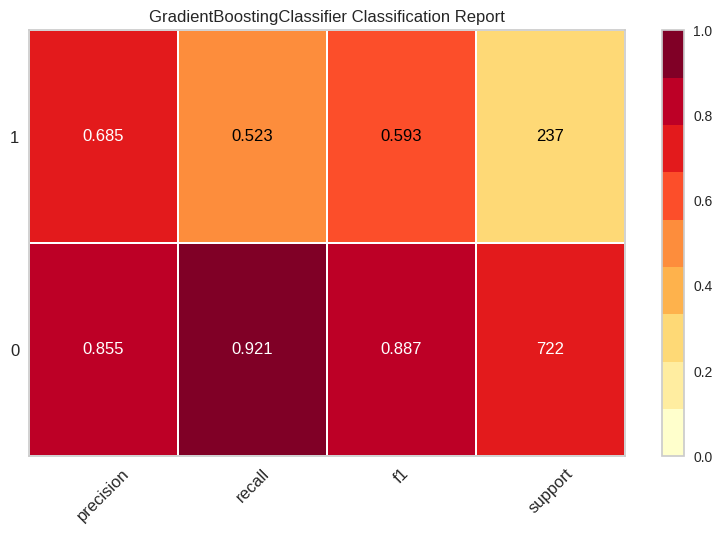

In [261]:
# plot class report
plot_model(best, plot = 'class_report')

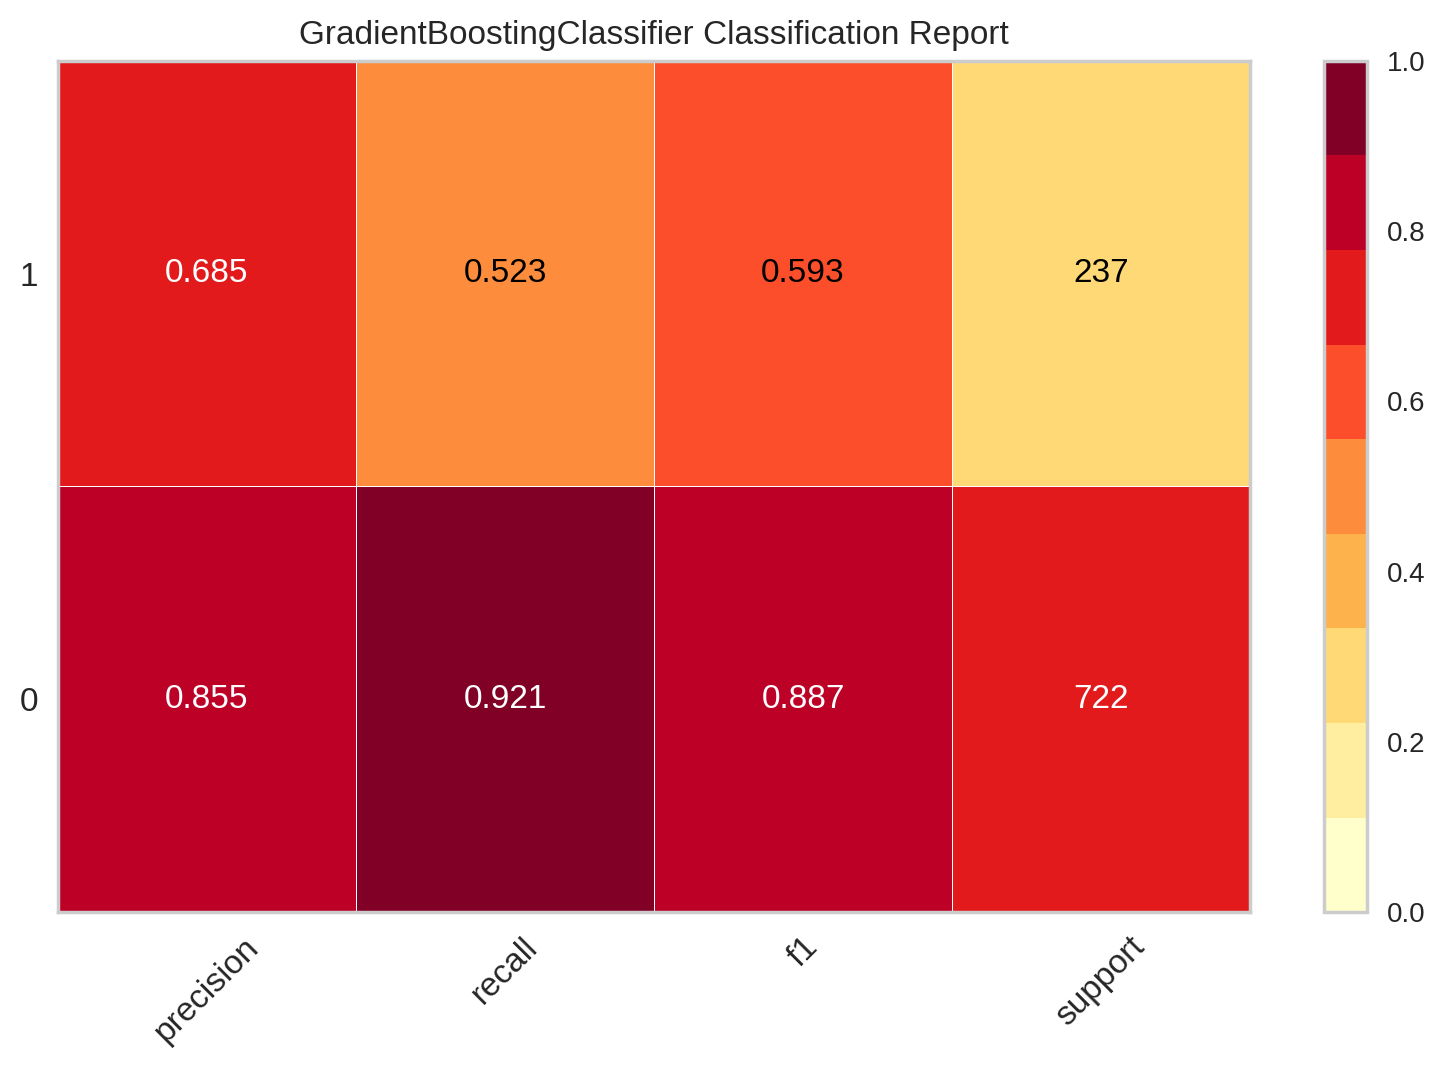

In [262]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [263]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [264]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7768,0.8808,0.7768,0.7690,0.7723,0.3745,0.3756
1,0.7857,0.9074,0.7857,0.7722,0.7763,0.3757,0.3803
2,0.8125,0.8970,0.8125,0.8063,0.8087,0.4746,0.4759
3,0.7946,0.8845,0.7946,0.7999,0.7970,0.4590,0.4595
4,0.8170,0.9119,0.8170,0.8073,0.8097,0.4702,0.4751
5,0.7991,0.8962,0.7991,0.8029,0.8008,0.4737,0.4740
6,0.7991,0.8838,0.7991,0.7957,0.7972,0.4545,0.4548
7,0.7803,0.8748,0.7803,0.7844,0.7822,0.4194,0.4196
8,0.7713,0.8550,0.7713,0.7756,0.7733,0.3957,0.3959


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

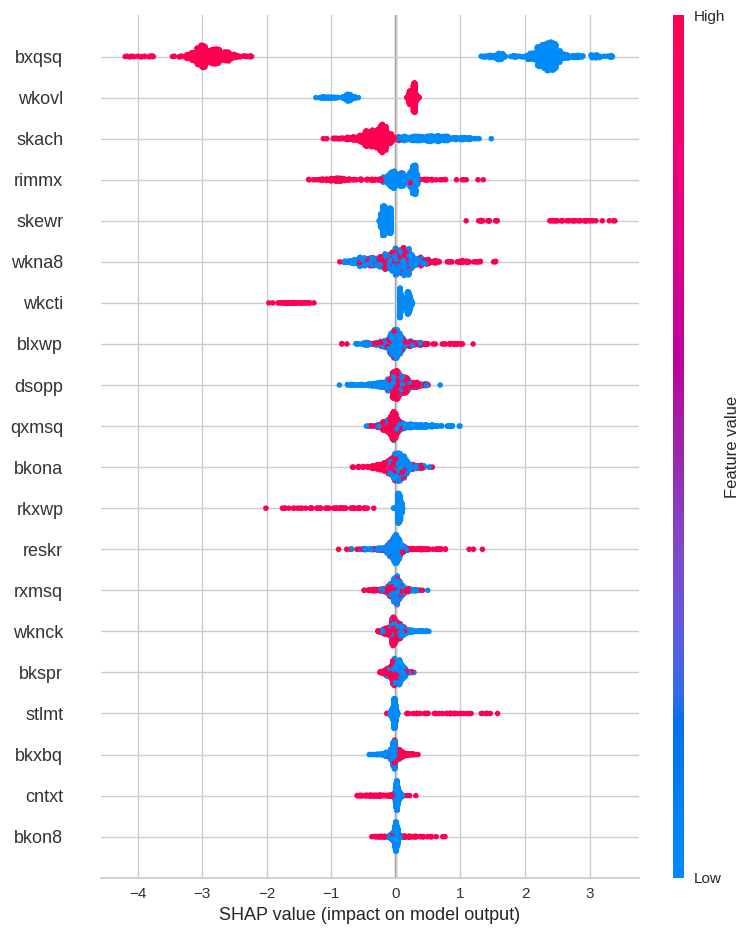

In [265]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [266]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [267]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/58 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.8073,0.8876,0.8073,0.7995,0.8006,0.4496,0.4551
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.7903,0.8475,0.7903,0.7825,0.7848,0.4091,0.4120
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.7327,0.8230,0.7327,0.8705,0.7507,0.4728,0.5549
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.7608,0.6837,0.7608,0.7567,0.7577,0.3418,0.3435
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.8010,0.8798,0.8010,0.8097,0.7946,0.4455,0.4656
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8069,0.8839,0.8069,0.8043,0.8039,0.4669,0.4702
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.7680,0.8372,0.7680,0.7666,0.7666,0.3696,0.3709
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.7327,0.8740,0.7327,0.8720,0.7506,0.4737,0.5571
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8060,0.8881,0.8060,0.7981,0.7995,0.4472,0.4520


In [268]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)]],
         verbose=False)

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [269]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [270]:
automl()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [271]:
# dashboard function
dashboard(dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅Create App
This function creates a basic gradio app for inference.

In [272]:
# create gradio app
create_app(best)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7fbad7e3253a2effb1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [273]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [281]:
!python my_first_api.py

Transformation Pipeline and Model Successfully Loaded
Traceback (most recent call last):
  File "/content/my_first_api.py", line 16, in <module>
    input_model = create_model("my_first_api_input", **{'bkblk': 'f', 'bknwy': 'f', 'bkon8': 'f', 'bkona': 'f', 'bkspr': 'f', 'bkxbq': 'f', 'bkxcr': 'f', 'bkxwp': 't', 'blxwp': 'f', 'bxqsq': 'f', 'cntxt': 'f', 'dsopp': 'g', 'dwipd': 'f', 'hdchk': 'n', 'katri': 'f', 'mulch': 't', 'qxmsq': 't', 'r2ar8': 'f', 'reskd': 'f', 'reskr': 'f', 'rimmx': 't', 'rkxwp': 't', 'rxmsq': 'f', 'simpl': 'f', 'skach': 'f', 'skewr': 'f', 'skrxp': 'f', 'spcop': 'f', 'stlmt': 'f', 'thrsk': 'f', 'wkcti': 'f', 'wkna8': 'f', 'wknck': 't', 'wkovl': 't'})
  File "/usr/local/lib/python3.10/dist-packages/pydantic/main.py", line 1600, in create_model
    return meta(
  File "/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_model_construction.py", line 115, in __new__
    private_attributes = inspect_namespace(
  File "/usr/local/lib/python3.10/dist-packages/pydant

In [282]:
# check out the .py file created with this magic command
%load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [274]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [284]:
# check out the DockerFile file created with this magic command
%load my_first_api

In [285]:
# check out the requirements file created with this magic command
%load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [41]:
final_best = finalize_model(best)

In [287]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [288]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[9] <= 0.5) {
            if (input[27] <= 0.5) {
                if (input[32] <= 0.5) {
                    if (input[26] <= 0.5) {
                        if (input[8] <= 0.5) {
                            if (input[30] <= 0.5) {
                                if (input[11] <= 0.5) {
                                    if (input[21] <= 0.5) {
                                        if (input[7] <= 0.5) {
                                            if (input[16] <= 0.5) {
                                                if (input[23] <= 0.5) {
                                                    if (input[17] <= 0.5) {
                                                        if (input[34] <= 0.5) {
                                                            if (input[33] <= 0.5) {
                                                                if (input[24] <= 0.5) {
        

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [40]:
# # deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [34]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss=

In [35]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [36]:
# save experiment
save_experiment('my_experiment')

In [39]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=X)

,Description,Value
0,Session id,123
1,Target,wkpos
2,Target type,Binary
3,Target mapping,"n: 0, t: 1"
4,Original data shape,"(3196, 35)"
5,Transformed data shape,"(3196, 37)"
6,Transformed train set shape,"(2237, 37)"
7,Transformed test set shape,"(959, 37)"
8,Categorical features,34
9,Preprocess,True
